# h5

In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from PIL import ImageFont, ImageDraw, Image
 
#모델 실행
model = load_model('test.h5')
model.summary()

# open webcam (웹캠 열기)
webcam = cv2.VideoCapture(0)

if not webcam.isOpened():
    print("Could not open webcam")
    exit()

# loop through frames
while webcam.isOpened():

    # read frame from webcam 
    status, frame = webcam.read()

    if not status:
        break

    img = cv2.resize(frame, (416, 416), interpolation = cv2.INTER_AREA)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    prediction = model.predict(x)
    predicted_class = np.argmax(prediction[0]) # 예측된 클래스 0, 1, 2...

#     print(prediction[0])
#     print(predicted_class)
    
    if predicted_class == 0:
        me = "A"
    elif predicted_class == 1:
        me = "B"        
    elif predicted_class == 2:
        me = "C"
    elif predicted_class == 3:
        me = "D"
    elif predicted_class == 4:
        me = "E"
    elif predicted_class == 5:
        me = "F"

    # display
    fontpath = "font/gulim.ttc"
    font1 = ImageFont.truetype(fontpath, 100)
    frame_pil = Image.fromarray(frame)
    draw = ImageDraw.Draw(frame_pil)
    draw.text((50, 50), me, font=font1, fill=(0, 0, 255, 3))
    frame = np.array(frame_pil)
    cv2.imshow('RPS', frame)

    # press "Q" to stop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# release resources
webcam.release()
cv2.destroyAllWindows()   

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 414, 414, 32)      896       
_________________________________________________________________
batch_normalization_72 (Batc (None, 414, 414, 32)      128       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 412, 412, 32)      9248      
_________________________________________________________________
batch_normalization_73 (Batc (None, 412, 412, 32)      128       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 206, 206, 32)      0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 206, 206, 32)      0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 204, 204, 64)     

# h5 model test by photo

In [14]:
model = load_model('C:/Users/User/Desktop/yolov3/model/test2.h5')

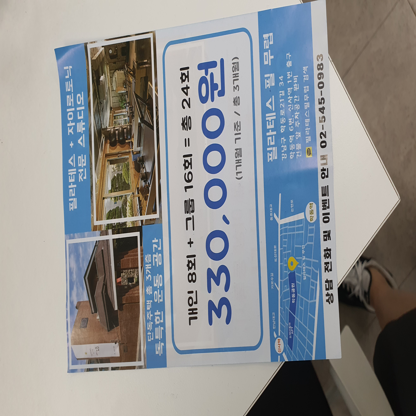

 Prediction:  metal


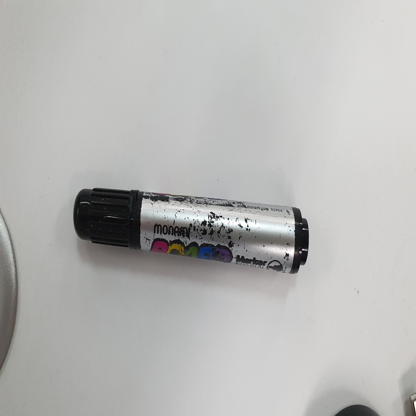

 Prediction:  metal


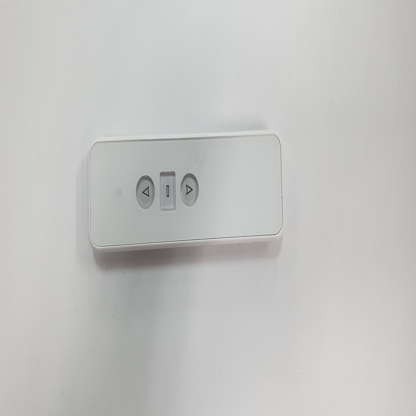

 Prediction:  plastic


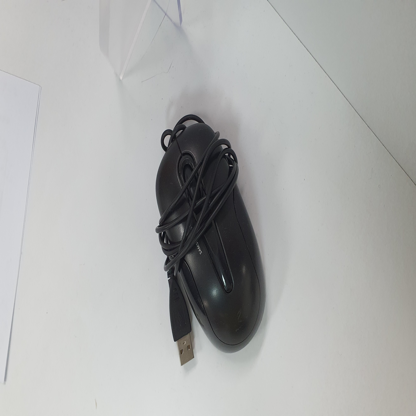

 Prediction:  glass


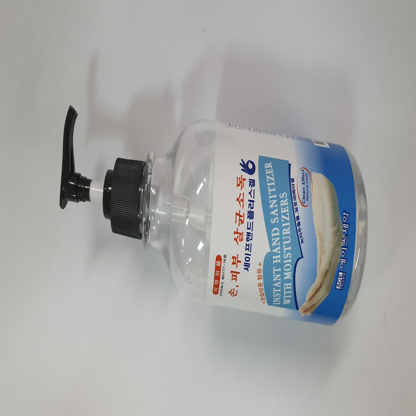

 Prediction:  plastic


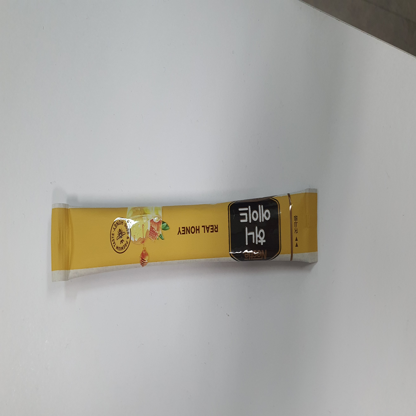

 Prediction:  plastic


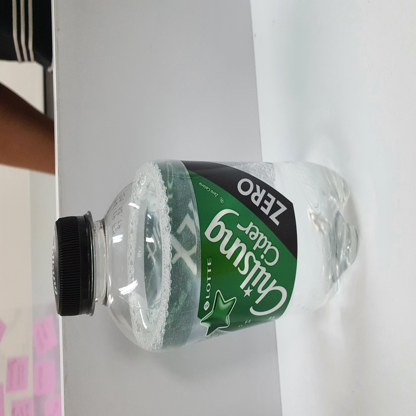

 Prediction:  metal


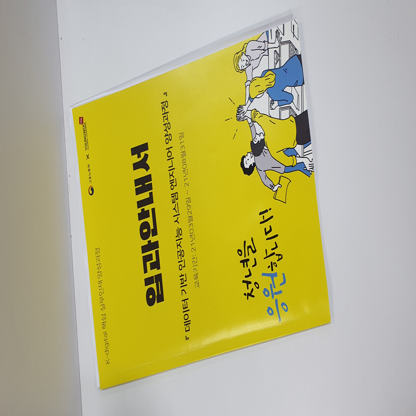

 Prediction:  plastic


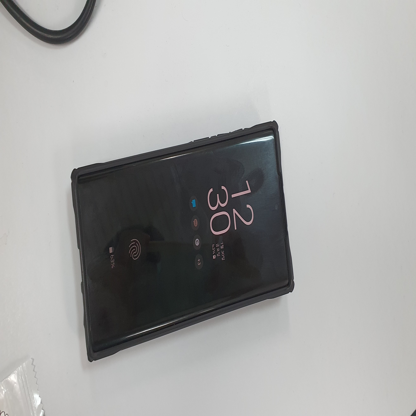

 Prediction:  glass


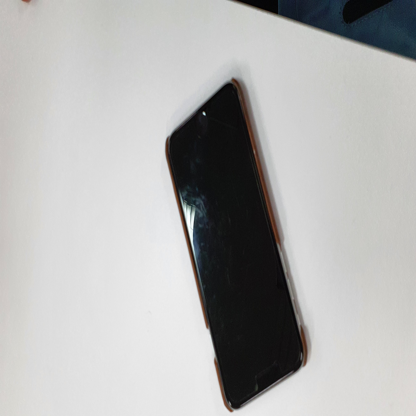

 Prediction:  glass


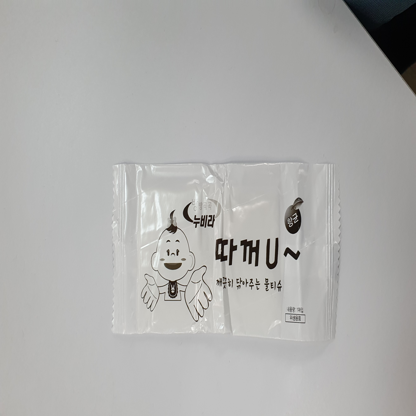

 Prediction:  plastic


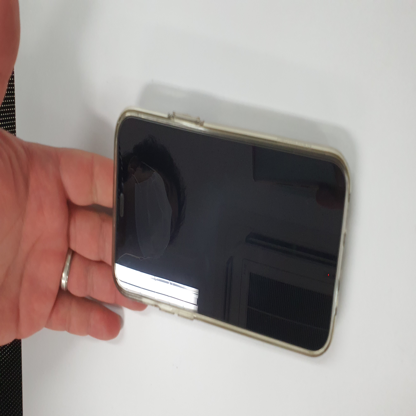

 Prediction:  glass


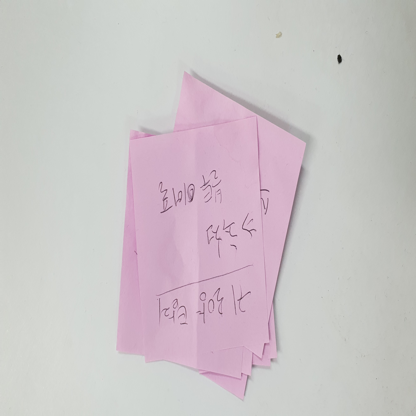

 Prediction:  paper


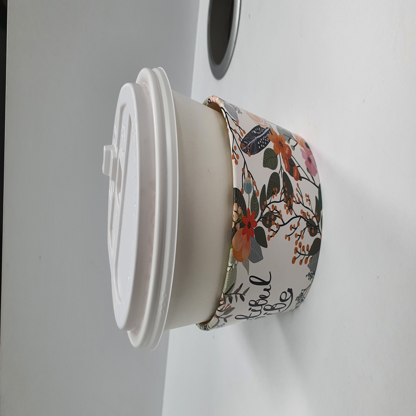

 Prediction:  plastic


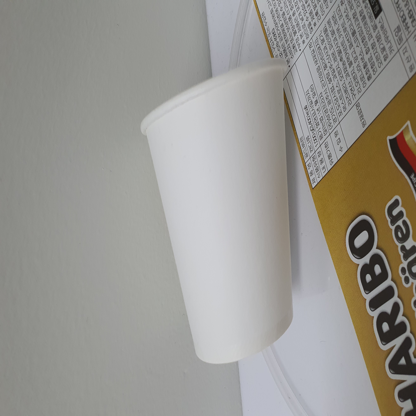

 Prediction:  plastic


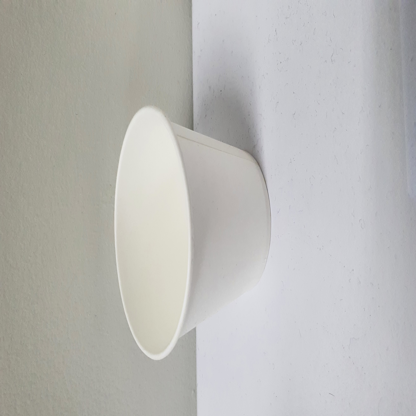

 Prediction:  plastic


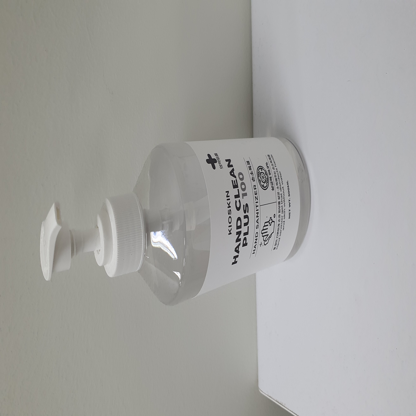

 Prediction:  plastic


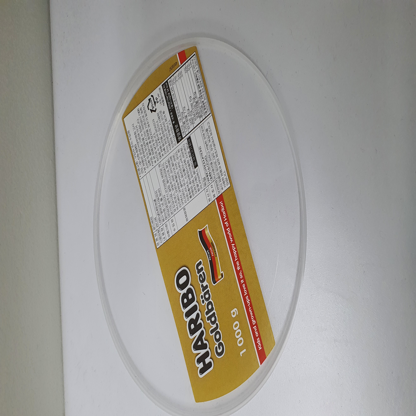

 Prediction:  plastic


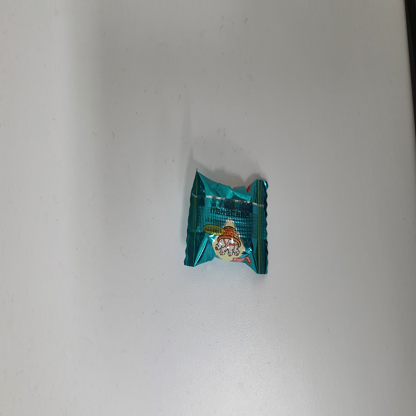

 Prediction:  plastic


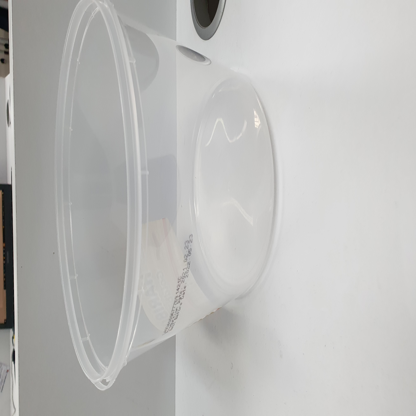

 Prediction:  plastic


In [15]:
from PIL import Image
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
for image in range(1,21):
    img = Image.open(f'C:/Users/User/Desktop/yolov3/test_image/{image}.jpg')
    img = img.resize((416, 416))
    display(img)
    x = keras.preprocessing.image.img_to_array(img)
    x = x/255
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
    pred = labels[np.argmax(classes)]

    print(" Prediction: ", pred)

# darknet model test by photo

In [59]:
import sys
import numpy as np
import cv2


# 모델 & 설정 파일
model = 'C:/Users/User/Desktop/kim/yolo_v3/yolov3.weights'
config = 'C:/Users/User/Desktop/kim/yolo_v3/yolov3.cfg'
class_labels = 'C:/Users/User/Desktop/kim/yolo_v3/coco.names'

confThreshold = 0.5
nmsThreshold = 0.4

# 테스트 이미지 파일
img_files = []
for image in range(1,21):
    img_files.append(f'C:/Users/User/Desktop/yolov3/test_image/{image}.jpg')


# 네트워크 생성
net = cv2.dnn.readNet(model, config)

if net.empty():
    print('Net open failed!')
    sys.exit()

# 클래스 이름 불러오기

classes = []
with open(class_labels, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

colors = np.random.uniform(0, 255, size=(len(classes), 3))

# 출력 레이어 이름 받아오기

layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
# output_layers = ['yolo_82', 'yolo_94', 'yolo_106']

# 실행

for f in img_files:
    img = cv2.imread(f)
    img = cv2.resize(img, dsize=(800, 800))

    if img is None:
        continue

    # 블롭 생성 & 추론
    blob = cv2.dnn.blobFromImage(img, 1/255., (320, 320), swapRB=True)
    net.setInput(blob)
    outs = net.forward(output_layers) #

    # outs는 3개의 ndarray 리스트.
    # outs[0].shape=(507, 85), 13*13*3=507
    # outs[1].shape=(2028, 85), 26*26*3=2028
    # outs[2].shape=(8112, 85), 52*52*3=8112

    h, w = img.shape[:2]

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            # detection: 4(bounding box) + 1(objectness_score) + 80(class confidence)
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > confThreshold:
                # 바운딩 박스 중심 좌표 & 박스 크기
                cx = int(detection[0] * w)
                cy = int(detection[1] * h)
                bw = int(detection[2] * w)
                bh = int(detection[3] * h)

                # 바운딩 박스 좌상단 좌표
                sx = int(cx - bw / 2)
                sy = int(cy - bh / 2)

                boxes.append([sx, sy, bw, bh])
                confidences.append(float(confidence))
                class_ids.append(int(class_id))

    # 비최대 억제, Non Max Suppression
#     https://www.visiongeek.io/2018/07/yolo-object-detection-opencv-python.html
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)

    for i in indices:
        i = i[0]
        sx, sy, bw, bh = boxes[i]
        label = f'{classes[class_ids[i]]}: {confidences[i]:.2}'
        color = colors[class_ids[i]]
        cv2.rectangle(img, (sx, sy, bw, bh), color, 2)
        cv2.putText(img, label, (sx, sy - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2, cv2.LINE_AA)

    t, _ = net.getPerfProfile()
    label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
    cv2.putText(img, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 0, 255), 1, cv2.LINE_AA)

    cv2.imshow('img', img)
    cv2.waitKey()

cv2.destroyAllWindows()

# darknet model test by webcam

In [28]:
import sys
import numpy as np
import cv2
import time
from datetime import datetime

# 모델 & 설정 파일
model = './our_yolov3/yolov3_training_final.weights'
config = './our_yolov3/yolov3_testing.cfg'
class_labels = './our_yolov3/garbage.names'

# model = './custom-yolov4-tiny-detector_final.weights'
# config = './yolov4-tiny.cfg'
# class_labels = './obj.names'

confThreshold = 0.5
nmsThreshold = 0.4

# 네트워크 생성
# net = cv2.dnn.readNetFromTensorflow(model, config)
net = cv2.dnn.readNet(model, config)

if net.empty():
    print('Net open failed!')
    sys.exit()

# 클래스 이름 불러오기

classes = []
with open(class_labels, "r") as f:
    classes = [line.strip() for line in f.readlines()]
print(classes)

colors = np.random.uniform(0, 255, size=(len(classes), 3))

# 출력 레이어 이름 받아오기
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
# output_layers = ['yolo_82', 'yolo_94', 'yolo_106']

cap = cv2.VideoCapture(0)

while True:
#     print(datetime.now().strftime('%Y-%m-%d %H:%M:%SSS'))
    ret, frame = cap.read()
#     img = cv2.imread(frame)

    if frame is None :
        continue

    h, w, c = frame.shape

    blob = cv2.dnn.blobFromImage(frame, 1/255., (416, 416), swapRB=True)
    net.setInput(blob)
    outs = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            # detection: 4(bounding box) + 1(objectness_score) + 80(class confidence)
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > confThreshold:
                # 바운딩 박스 중심 좌표 & 박스 크기
                cx = int(detection[0] * w)
                cy = int(detection[1] * h)
                bw = int(detection[2] * w)
                bh = int(detection[3] * h)

                # 바운딩 박스 좌상단 좌표
                sx = int(cx - bw / 2)
                sy = int(cy - bh / 2)

                boxes.append([sx, sy, bw, bh])
                confidences.append(float(confidence))
                class_ids.append(int(class_id))

    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)
#     print('len(boxes) :', len(boxes))
#     print('indices :', indices)

    for i in range(len(boxes)):
        if i in indices:
            sx, sy, bw, bh = boxes[i]
            label = f'{classes[class_ids[i]]}: {confidences[i]:.2}'
            color = colors[class_ids[i]]
            cv2.rectangle(frame, (sx, sy, bw, bh), color, 2)
            cv2.putText(frame, label, (sx, sy - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2, cv2.LINE_AA)

        t, _ = net.getPerfProfile()
        label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
        cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (0, 0, 255), 1, cv2.LINE_AA)

    cv2.imshow('frame', frame)
    if cv2.waitKey(1000) == 27 :
        break

cv2.destroyAllWindows()

['glass_beer', 'glass_cocktail', 'glass_cup', 'glass_drink', 'glass_etc', 'glass_square', 'glass_storage', 'glass_vase', 'metal_can', 'metal_cap', 'paper_booknotebook', 'paper_etc', 'paper_leaflet', 'paper_paperbox', 'paper_sheet', 'plastic_angled_bottle', 'plastic_bottle', 'plastic_cup', 'plastic_cup_lid', 'plastic_etc', 'plastic_lid', 'plastic_plastic_box', 'vinil_vinil']


# h5 to pb - > no

In [13]:
# 1

import tensorflow as tf
import numpy as np
from tensorflow import keras

model = tf.keras.models.load_model('C:/Users/User/Desktop/yolov3/model/test.h5', compile=False)

export_path = 'C:/Users/User/Desktop/yolov3/model'
model.save(export_path, save_format='tf')

graph_filename = 'C:/Users/User/Desktop/yolov3/model/saved_model.pb'
with tf.io.gfile.GFile(graph_filename, "rb") as f:
    graph_def = tf.compat.v1.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.train.write_graph(graph_def, './', 'saved_model.pbtxt', True)

INFO:tensorflow:Assets written to: C:/Users/User/Desktop/yolov3/model\assets


DecodeError: Wrong wire type in tag.

# h5 to pb.txt (graph) - > 실패

In [9]:
# 2

import tensorflow.keras as keras
import tensorflow as tf
import os
 
#This function is referenced from the Internet
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.
    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ''
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph
 
 
if __name__ == '__main__':
    input_path = 'C:/users/User/Desktop/yolov3'
         #keras training saved h5 files
    input_file = 'test.h5'
    weight_file_path = os.path.join(input_path, input_file)
    output_graph_name = weight_file[:-3] + '.pb'
 
         # Load model
    keras.backend.set_learning_phase(0)
    h5_model = keras.models.load_model(weight_file_path)
    frozen_graph = freeze_session(keras.backend.get_session(), output_names=[out.op.name for out in h5_model.outputs])
    tf.train.write_graph(frozen_graph, input_path, output_graph_name, as_text=False)
    print('Finished')
 
    import cv2
    model = cv2.dnn.readNetFromTensorflow("D:\\training\\my_model.pb")
    print('Load')


from keras import backend as K

# Create, compile and train model...

frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

AttributeError: module 'keras.utils.generic_utils' has no attribute 'populate_dict_with_module_objects'

# pb, pbtxt 한번에 --> 실패

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
import numpy as np
from tensorflow.keras.models import load_model

#path of the directory where you want to save your model
frozen_out_path = 'C:/Users/User/Desktop/yolov3/model'

# name of the .pb file
frozen_graph_filename = 'frozen_graph'

# Your model
model = load_model('C:/Users/User/Desktop/yolov3/model/test.h5')

# Convert Keras model to ConcreteFunction
full_model = tf.function(lambda x: model(x))
full_model = full_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

# Get frozen ConcreteFunction
frozen_func = convert_variables_to_constants_v2(full_model)
frozen_func.graph.as_graph_def()

layers = [op.name for op in frozen_func.graph.get_operations()]
print("-" * 60)
print("Frozen model layers: ")
for layer in layers:
    print(layer)
print("-" * 60)
print("Frozen model inputs: ")
print(frozen_func.inputs)
print("Frozen model outputs: ")
print(frozen_func.outputs)

# Save frozen graph to disk
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pb",
                  as_text=False)


# Save its text representation
tf.io.write_graph(graph_or_graph_def=frozen_func.graph,
                  logdir=frozen_out_path,
                  name=f"{frozen_graph_filename}.pbtxt",
                  as_text=True)

# optimized_graph_path = f"C:/Users/User/Desktop/yolov3/model/{frozen_graph_filename}.pb"
# output_pbtxt = f"C:/Users/User/Desktop/yolov3/model/{frozen_graph_filename}.pbtxt"

# # Read the graph.
# with tf.io.gfile.GFile(optimized_graph_path, "rb") as f:
#     graph_def = tf.compat.v1.GraphDef()
#     graph_def.ParseFromString(f.read())
    
    
# # Remove Const nodes.
# for i in reversed(range(len(graph_def.node))):
#     if graph_def.node[i].op == 'Const':
#         del graph_def.node[i]
#     for attr in ['T', 'data_format', 'Tshape', 'N', 'Tidx', 'Tdim',
#                  'use_cudnn_on_gpu', 'Index', 'Tperm', 'is_training',
#                  'Tpaddings']:
#         if attr in graph_def.node[i].attr:
#             del graph_def.node[i].attr[attr]
            
# # Save as text.
# tf.io.write_graph(graph_def, "", output_pbtxt, as_text=True)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2
------------------------------------------------------------
Frozen model layers: 
x
sequential_8/conv2d_64/Conv2D/ReadVariableOp/resource
sequential_8/conv2d_64/Conv2D/ReadVariableOp
sequential_8/conv2d_64/Conv2D
sequential_8/conv2d_64/BiasAdd/ReadVariableOp/resource
sequential_8/conv2d_64/BiasAdd/ReadVariableOp
sequential_8/conv2d_64/BiasAdd
sequential_8/conv2d_64/Relu
sequential_8/batch_normalization_72/ReadVariableOp/resource
sequential_8/batch_normalization_72/ReadVariableOp
sequential_8/batch_normalization_72/ReadVariableOp_1/resource
sequential_8/batch_normalization_72/ReadVariableOp_1
sequential_8/batch_normalization_72/FusedBatchNormV3/ReadVariableOp/resource
sequential_8/batch_normalization_72/FusedBatchNormV3/ReadVariableOp
sequential_8/batch_normalization_72/FusedBatchNo

'C:/Users/User/Desktop/yolov3/model\\frozen_graph.pbtxt'